# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :----|
|Breyner Gonçalves         | RM 334694     | `8IA` |
| Deborá Cristina Dantas   | RM 333637     | `8IA` |
| Marcelo Apovian Kayata   | RM 334006     | `8IA` 

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:

In [3]:
521

521

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [5]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
from os.path import isfile, join

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19, ResNet152V2
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [6]:
## IMPLEMENTE
divisao_treino_validacao = 0.3



In [7]:
## IMPLEMENTE

train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "chest-xray-pneumonia/training",
    batch_size=32,
    class_mode="categorical",
    color_mode='rgb',
    seed=5,
    target_size=(120,120),
    subset="training")


Found 3653 images belonging to 3 classes.


In [8]:
val_generator = train_datagen.flow_from_directory(
    "chest-xray-pneumonia/training",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    seed=5,
    target_size=(120,120),
    subset="validation")

Found 1563 images belonging to 3 classes.


In [9]:
train_generator.class_indices, val_generator.class_indices

({'BACTERIAL': 0, 'CONTROLE': 1, 'VIRAL': 2},
 {'BACTERIAL': 0, 'CONTROLE': 1, 'VIRAL': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [10]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A RestNet50 é uma rede neural convolucional da Microsoft mais especificamente , é de uma arquitetura de Rede Neural Residual, construída por blocos residuais, estes blocos tem uma entrada x que passa por uma série de operações de convolução-relu-convolução. O resultado da operação f(x)é adicionado à entrada original x. A figura abaixo mostra a arquitetura do bloco. Essas camadas adicionadas são o mapeamento de identidade e as outras camadas são copiadas do modelo mais raso aprendido. Esta solução indica que um modelo mais profundo não deve produzir um erro de treinamento maior que sua versão mais rasa. A equação  H(x)= f(x)+x mostra o processamento que o bloco residual faz. Usada em problemas mais complexos tais como campos receptive(convoluções), não linearidade. 


<p align="center">
    <img src="imagens/arquitetura.png">
</p>

Especificamente RestNet50 consiste em 5 estágios cada um bloco com bloco residual.Cada bloco residual possui 3 camadas com convoluções 1x1 e 3x3. Nas redes neurais tradicionais, cada camada é inserida na próxima camada em rede com blocos residuais, cada camada é inserida na próxima camada e diretamente nas camadas de 2 a 3 saltos, chamadas conexões de identidade. O que caracteriza uma rede neural residual são sua conexões de identidade, as conexões de identidade levam a entrada diretamente para o final de cada bloco residual, como exemplo da imagem abaixo:    


<p align="center">
    <img src="imagens/residual.png">
</p>



A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [11]:
## IMPLEMENTE

qtde_classes = 3

In [12]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

/Users/BREYNER/opt/anaconda3/envs/teste/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [13]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [14]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [15]:
## IMPLEMENTE

qtde_epocas = 10

In [16]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5/5 [==============================] - 35s 7s/step - loss: 0.8240 - precision_score: 0.6262 - recall_score: 0.6187 - f1_score: 0.6216 - val_loss: 0.4597 - val_precision_score: 0.8375 - val_recall_score: 0.8375 - val_f1_score: 0.8375
Epoch 2/10
5/5 [==============================] - 27s 5s/step - loss: 0.2378 - precision_score: 0.8938 - recall_score: 0.8938 - f1_score: 0.8937 - val_loss: 0.4990 - val_precision_score: 0.7625 - val_recall_score: 0.7625 - val_f1_score: 0.7625
Epoch 3/10
5/5 [==============================] - 29s 6s/step - loss: 0.3658 - precision_score: 0.8875 - recall_score: 0.8875 - f1_score: 0.8875 - val_loss: 0.3808 - val_precision_score: 0.8562 - val_recall_score: 0.8562 - val_f1_score: 0.8562
Epoch 4/10
5/5 [==============================] - 24s 5s/step - loss: 0.2808 - precision_score: 0.9312 - recall_score: 0.9312 - f1_score: 0.9312 - val_loss: 0.5143 - val_precision_score: 0.8125 - val_recall_score: 0.8125

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

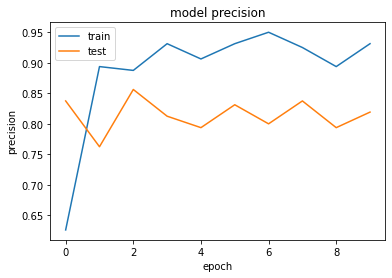

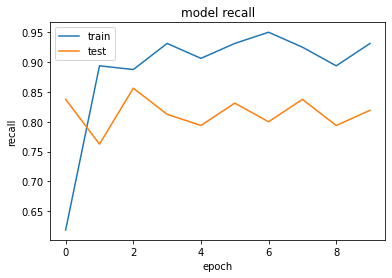

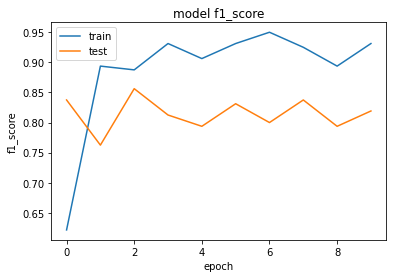

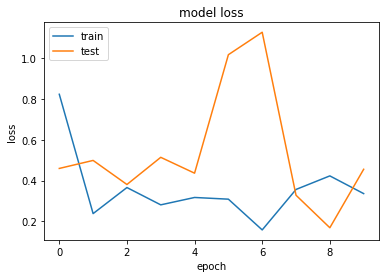

In [17]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

-> Precision pega todos os verdadeiros possitivos e divide pela quantidade de todos verdadeiros possitivos mais os falso possitivos, avaliando as classes e mostrando a média. 

-> Recall avalia todos os verdadeiros possitivos dividido pelos verdadeiros possitivos mais os falsos negativos para uma determinada classe.

-> F1 Score avalia o recall e o precision, podemos observar que o classificador está indo bem em ambas classes. 

-> Loss é uma metrica de erro , quanto menor o erro maior nossa acurácia.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 3/3
5/5 [==============================] - 50s 10s/step - loss: 0.3911 - precision_score: 0.8687 - recall_score: 0.8687 - f1_score: 0.8687 - val_loss: 0.5473 - val_precision_score: 0.7875 - val_recall_score: 0.7875 - val_f1_score: 0.7875```

**Resposta**:
```
Epoch 10/10
5/5 [==============================] - 24s 5s/step - loss: 0.3360 - precision_score: 0.9312 - recall_score: 0.9312 - f1_score: 0.9312 - val_loss: 0.4555 - val_precision_score: 0.8192 - val_recall_score: 0.8192 - val_f1_score: 0.8192
```

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A rede neural VGG16 é definida como o tipo de rede neural treinada especificamente pra mais de um milhão de tipos de imagens, sua arquitetura de rede utiliza camadas convolucionais 3x3 empilhadas umas sobre as outras com profundidade crescente , VGG16 significa que a rede tem 16 camadas. Na imagem abaixo mostra como é a arquitetura da rede, nela é possivel ver 13 camadas que fazem convolução retirando as features das imagens e mais 3 camadas totalmente conectadas para fazer as classificações. 

<p align="center">
    <img src="imagens/arquitetura_vgg16.png">
</p>

Exitem algumas desvantagens com o VGG16 tais como lentidão no treinamento e os pesos da arquitetura da rede são bastante grandes. Devido a sua profundidade e número de nós totalmente conetados, o VGG16 tem mais de 533MB, isto torna o VGG16 uma tarefa um pouco cansativa , a rede é usada em problemas de classificação de imagens de apredizado profundo é um ótimo bloco de construção para fins de aprendizado devido a sua fácilidade de implementação.   


<p align="center">
    <img src="imagens/arquitetura_vgg16_2.png">
</p>

In [18]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [19]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [20]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [21]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 63s 13s/step - loss: 4.4949 - precision_score: 0.5089 - recall_score: 0.5063 - f1_score: 0.5075 - val_loss: 0.6334 - val_precision_score: 0.7312 - val_recall_score: 0.7312 - val_f1_score: 0.7312
Epoch 2/10
5/5 [==============================] - 56s 11s/step - loss: 1.1852 - precision_score: 0.7875 - recall_score: 0.7875 - f1_score: 0.7875 - val_loss: 0.5538 - val_precision_score: 0.8125 - val_recall_score: 0.8125 - val_f1_score: 0.8125
Epoch 3/10
5/5 [==============================] - 53s 11s/step - loss: 1.3888 - precision_score: 0.8000 - recall_score: 0.8000 - f1_score: 0.8000 - val_loss: 0.6621 - val_precision_score: 0.8375 - val_recall_score: 0.8375 - val_f1_score: 0.8375
Epoch 4/10
5/5 [==============================] - 52s 10s/step - loss: 1.5118 - precision_score: 0.8375 - recall_score: 0.8375 - f1_score: 0.8375 - val_loss: 0.8886 - val_precision_score: 0.8813 - val_recall_score: 0.8813 - val_f1_score: 0.8812
Epoch 5/10
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

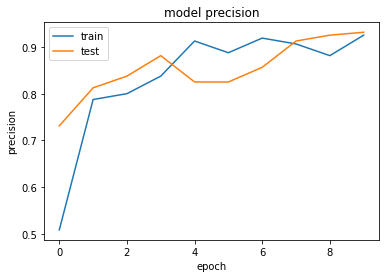

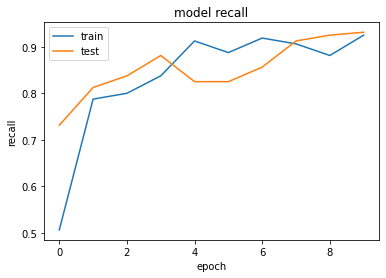

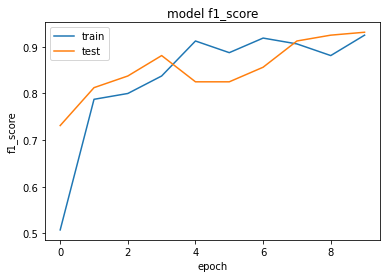

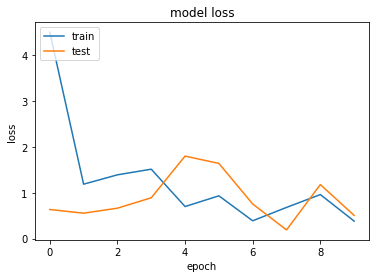

In [22]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:


-> Precision pega todos os verdadeiros possitivos e divide pela quantidade de todos verdadeiros possitivos mais os falso possitivos, avaliando as classes e mostrando a média. 

-> Recall avalia todos os verdadeiros possitivos dividido pelos verdadeiros possitivos mais os falsos negativos para uma determinada classe .

-> F1 Score avalia o recall e o precision, podemos observar que o classificador está indo bem em ambas classes. 

-> Loss é uma metrica de erro , quanto menor o erro maior nossa acurácia.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 3/3
5/5 [==============================] - 98s 20s/step - loss: 2.1257 - precision_score: 0.7450 - recall_score: 0.7450 - f1_score: 0.7450 - val_loss: 0.3833 - val_precision_score: 0.8188 - val_recall_score: 0.8188 - val_f1_score: 0.8187```

**Resposta**:
```
Epoch 10/10
5/5 [==============================] - 59s 12s/step - loss: 0.3806 - precision_score: 0.9250 - recall_score: 0.9250 - f1_score: 0.9250 - val_loss: 0.5048 - val_precision_score: 0.9312 - val_recall_score: 0.9312 - val_f1_score: 0.9312

```

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A rede VGG19 possui 19 camadas onde o tamanho da rede em termos de nós totalmente conectados é 574MB. O VGG19 consiste em pilhas de blocos lineares compostas de uma certa quantidade de camadas convolucionais, uma função de ativação não linear e uma camada Max Pool, seguidas por três camadas totalmente conectadas e uma Soft Max no final. A arquitetura VGG19 possui cinco desses blocos , os dois primeiros contém duas camadas convolucionais de 64 e 128 filtros. A rede é usada em problemas de classificação de imagens de apredizado profundo, como por exemplo no auxilio de diagnóstico de câncer .


<p align="center">
    <img src="imagens/arquitetura_vgg19.png">
</p>

In [23]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [24]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [25]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [26]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 95s 19s/step - loss: 1.7391 - precision_score: 0.8302 - recall_score: 0.8250 - f1_score: 0.8276 - val_loss: 1.2767 - val_precision_score: 0.7563 - val_recall_score: 0.7563 - val_f1_score: 0.7562
Epoch 2/10
5/5 [==============================] - 80s 16s/step - loss: 1.2174 - precision_score: 0.8250 - recall_score: 0.8250 - f1_score: 0.8250 - val_loss: 0.7973 - val_precision_score: 0.8750 - val_recall_score: 0.8750 - val_f1_score: 0.8750
Epoch 3/10
5/5 [==============================] - 72s 14s/step - loss: 1.3184 - precision_score: 0.8438 - recall_score: 0.8438 - f1_score: 0.8437 - val_loss: 1.9932 - val_precision_score: 0.8813 - val_recall_score: 0.8813 - val_f1_score: 0.8812
Epoch 4/10
5/5 [==============================] - 68s 14s/step - loss: 0.5444 - precision_score: 0.9062 - recall_score: 0.9062 - f1_score: 0.9062 - val_loss: 0.4575 - val_precision_score: 0.8938 - val_recall_score: 0.8938 - val_f1_score: 0.8937
Epoch 5/10
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

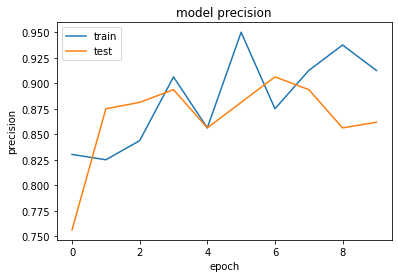

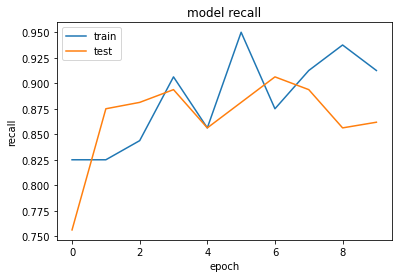

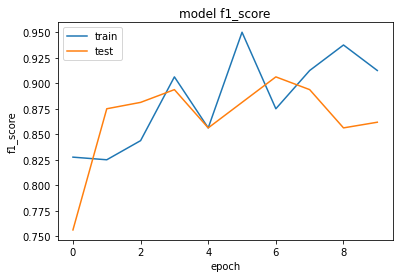

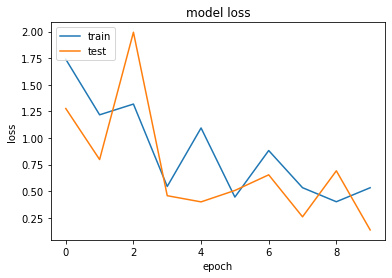

In [27]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

-> Precision pega todos os verdadeiros possitivos e divide pela quantidade de todos verdadeiros possitivos mais os falso possitivos, avaliando as classes e mostrando a média. 

-> Recall avalia todos os verdadeiros possitivos dividido pelos verdadeiros possitivos mais os falsos negativos para uma determinada classe .

-> F1 Score avalia o recall e o precision, podemos observar que o classificador está indo bem em ambas classes. 

-> Loss é uma metrica de erro , quanto menor o erro maior nossa acurácia.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 3/3
5/5 [==============================] - 127s 25s/step - loss: 1.2855 - precision_score: 0.8188 - recall_score: 0.8188 - f1_score: 0.8187 - val_loss: 0.1204 - val_precision_score: 0.8813 - val_recall_score: 0.8813 - val_f1_score: 0.8812```

**Resposta**:
```
Epoch 10/10
5/5 [==============================] - 70s 14s/step - loss: 0.5323 - precision_score: 0.9125 - recall_score: 0.9125 - f1_score: 0.9125 - val_loss: 0.1361 - val_precision_score: 0.8618 - val_recall_score: 0.8618 - val_f1_score: 0.8618
```

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 0.8192  %    | 0.8192  %         | 0.8192  %    |
| VGG16    | 0.9312 %     | 0.9312  %         | 0.9312 %     |
| VGG19    | 0.8618 %     | 0.8618 %          | 0.8618 %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**: 
<br>
Os modelos possuem níveis de e quantidade de camadas diferentes, podendo ter influência sobre o resultado de síada. 
<br>
ResNet50: 3 camadas
<br>
VGG16:  13 camadas
<br>
VGG19: possui 19 camadas

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [28]:
#IMPLEMENTE
conv_base = ResNet152V2(include_top=False)
for layer in conv_base.layers:
    layer.trainable = False

In [29]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

Total params: 58,594,307
Trainable params: 262,659
Non-trainable params: 58,331,648
__________________________________________________________________________________________________


In [30]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])


In [31]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 76s 15s/step - loss: 0.6292 - precision_score: 0.7982 - recall_score: 0.6625 - f1_score: 0.6959 - val_loss: 7.0517 - val_precision_score: 0.7063 - val_recall_score: 0.7063 - val_f1_score: 0.7062
Epoch 2/10
5/5 [==============================] - 64s 13s/step - loss: 0.3463 - precision_score: 0.8813 - recall_score: 0.8813 - f1_score: 0.8812 - val_loss: 6.5480 - val_precision_score: 0.6938 - val_recall_score: 0.6938 - val_f1_score: 0.6937
Epoch 3/10
5/5 [==============================] - 67s 13s/step - loss: 0.4848 - precision_score: 0.8750 - recall_score: 0.8750 - f1_score: 0.8750 - val_loss: 6.5480 - val_precision_score: 0.7625 - val_recall_score: 0.7625 - val_f1_score: 0.7625
Epoch 4/10
5/5 [==============================] - 62s 12s/step - loss: 0.2508 - precision_score: 0.9250 - recall_score: 0.9250 - f1_score: 0.9250 - val_loss: 4.5332 - val_precision_score: 0.6875 - val_recall_score: 0.6875 - val_f1_score: 0.6875
Epoch 5/10
5/5 [====

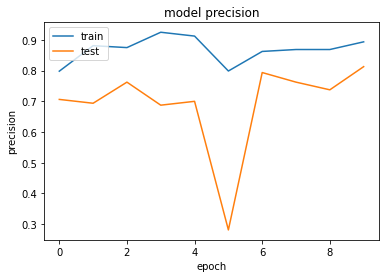

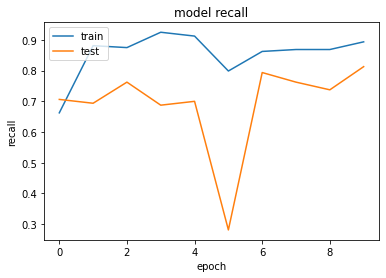

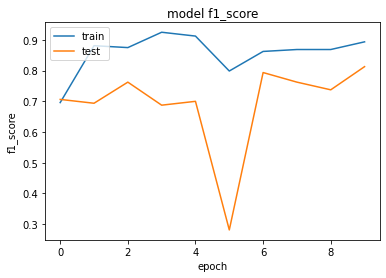

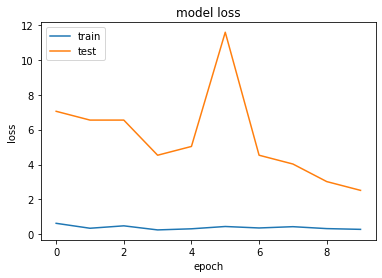

In [32]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

In [ ]:
Para solução foi implementado um RestNet152 portanto não obteve um valor supeior as demais arquiteturas.